**[Link to the Data Set on Kaggle](https://www.kaggle.com/lava18/google-play-store-apps)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
playstore = pd.read_csv('googleplaystore.csv')
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# to be sure, whether all datatypes are right and there are no missing values
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


On the spot it is clear:
1. Entries without rating need to be either deleted or imputed
2. Reviews, Size, Installs, Price, Current version and Android version should be a numerical columns
3. Last Updated look more informative as datetime-column
4. There are some rows with more than 1 Genre, separated with ;. It could be a viable choise to transform these rows, if there are not so many.

# Data Cleaning

We can go throw each column separately.
Column 'App' = name, so it doesn't need to be changed.

### Category

In [4]:
playstore.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

This Category looks kinda wierd and there is no ideas what name to give. It's better to exclude 1 row in our case.

In [5]:
playstore = playstore[playstore.Category !='1.9']

### Rating

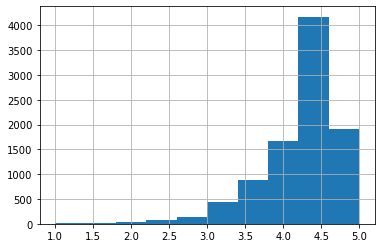

In [6]:
playstore.Rating.hist()

There are no outliers, so at leat we could go further. As we have seen previously, there are a decent amount of null values. We could impute with the median value of entries which sharing same category (and/or having same or smalle amount of downloads)

In [7]:
playstore[playstore.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [8]:
# Create a groupby object: by_category
by_category = playstore.groupby('Category')

In [9]:
# Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())

In [10]:
# Impute rating and assign to dataframe.Rating
playstore.Rating = by_category.Rating.transform(impute_median)
##OR Simply
# appstore['Rating']=appstore.groupby('Category')['Rating'].apply(lambda x: x.fillna(x.median()))

### Reviews

In [11]:
playstore.Reviews = pd.to_numeric(playstore['Reviews'], errors='coerce')

### Size

In [12]:
playstore['Size']=playstore['Size'].apply(lambda x: str(x).replace('k', 'e+3') if 'k' in str(x) else str(x).replace('M', 'e+6'))

In [13]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19e+6,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14e+6,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7e+6,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25e+6,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8e+6,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
playstore['Size']= playstore['Size'].astype('float32')

ValueError: could not convert string to float: 'Varies with device'

There are some values, which could not be converted. 'Varies with device'could be not the only one.
We can write a custom function to check, which values are not convertable in order to see, how they look like.

In [15]:
def is_convertable(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

In [16]:
temp=playstore.Size.apply(lambda x: is_convertable(x))
playstore.Size[~temp].value_counts()

Varies with device    1695
Name: Size, dtype: int64

In [17]:
playstore.Size=playstore.Size.replace('Varies with device',np.nan)
playstore.Size=pd.to_numeric(playstore.Size)

There are a lot of ways what to do with missing values. It is viable to delete rows with missing values, but we will  impute with median value across category ( or mean ) 

In [18]:
playstore['Size']=playstore.groupby('Category')['Size'].apply(lambda x: x.fillna(x.median()))

### Installs

In [19]:
playstore.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [20]:
playstore.Installs = playstore.Installs.apply(lambda x: x.strip('+')).apply(lambda x: x.replace(',', ''))
playstore.Installs = playstore.Installs.replace('Free', np.nan)

In [21]:
playstore['Installs']= playstore['Installs'].astype('int32')

### Type

In [22]:
playstore.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

Everything is clear

### Price

In [23]:
playstore.Price.value_counts()

0        10040
$0.99      148
$2.99      129
$1.99       73
$4.99       72
         ...  
$4.29        1
$1.04        1
$2.90        1
$4.59        1
$1.26        1
Name: Price, Length: 92, dtype: int64

In [24]:
playstore.Price = playstore.Price.apply(lambda x: x.strip('$'))
playstore.Price = pd.to_numeric(playstore.Price)

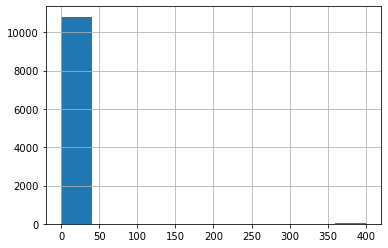

In [25]:
playstore.Price.hist()

Look like there are some outliers. Or are there really some expensive apps in our dataset?

In [26]:
playstore[playstore.Price > 350]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900000.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965000.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2700000.0,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


Yeah, here is really some expensive apps.

### Category

In [27]:
playstore['Content Rating'].value_counts() 

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Everything is clear

### Genres

In [28]:
playstore['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

We could create additional column with the 2nd subgenre. But we will just split the second part and left only primary category.

In [29]:
playstore.Genres = playstore.Genres.apply(lambda x: x.split(';')[0])

### Last Updated

In [30]:
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'])

### Current Ver

In [31]:
playstore['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

Let's cut all version details in order to make it more tidier. We will cut everyting after second number.
We should replace all NaN with Varies with data to make simplier.

In [32]:
playstore['Current Ver'].isna().sum()

8

In [33]:
import re
playstore['Current Ver']=playstore['Current Ver'].replace(np.nan,'Varies with device')
playstore['Current Ver']=playstore['Current Ver'].apply(lambda x: 'Varies with device' if x=='Varies with device' else re.findall('^[0-9]\.[0-9]|[\d]|\W*', str(x))[0])

### Android Ver

In [34]:
playstore['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

We could make two columns with low and high versions, but it won't be impactfull in term of information. Minimal requirements are more important
Let's leave only the low version.

In [35]:
playstore['Android Ver'] = playstore['Android Ver'].apply(lambda x: str(x).split(' and ')[0].split(' - ')[0])
playstore['Android Ver'] = playstore['Android Ver'].replace('4.4W', '4.4')
playstore['Android Ver'] = playstore['Android Ver'].replace('nan', 'Varies with device')
playstore['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1',
       '1.0'], dtype=object)

#### It is better to save our new csv-file and use it from now

In [36]:
playstore.to_csv('gstore_clean.csv', index = False)

In [37]:
playstore = pd.read_csv('gstore_clean.csv')

# Explorative Analysis

In [38]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4


In [39]:
playstore.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000
mean,4.206661,4.441529e+05,2.032294e+07,1.546434e+07,1.027368
std,0.481372,2.927761e+06,2.123139e+07,8.502936e+07,15.949703
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5.600000e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.200000e+07,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,2.700000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [40]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Number of applications by category')

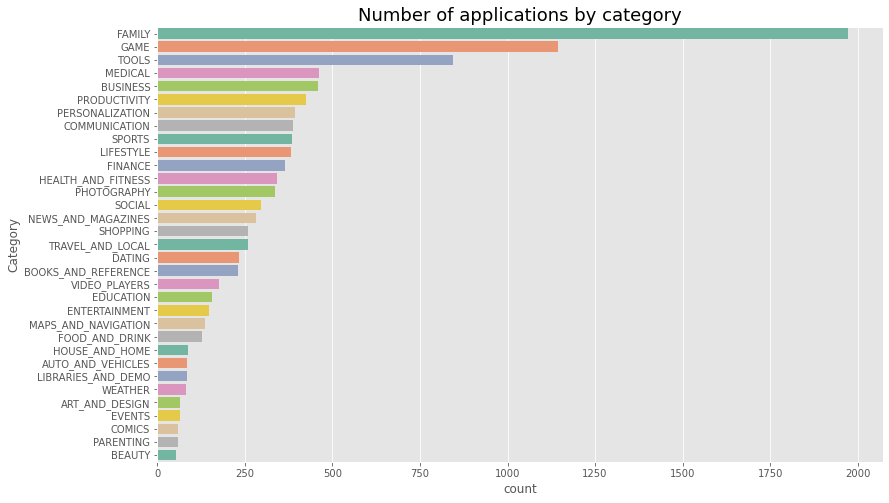

In [41]:
plt.rcParams['figure.figsize'] = 13,8
sns.countplot(y=playstore.Category, order = playstore.Category.value_counts().index, palette='Set2')
plt.title('Number of applications by category', size=18)

3 most represented categories are Family, Game and Tools, followed by Medical Business and Productivity.

Text(0.5, 1.0, 'Size Distribution')

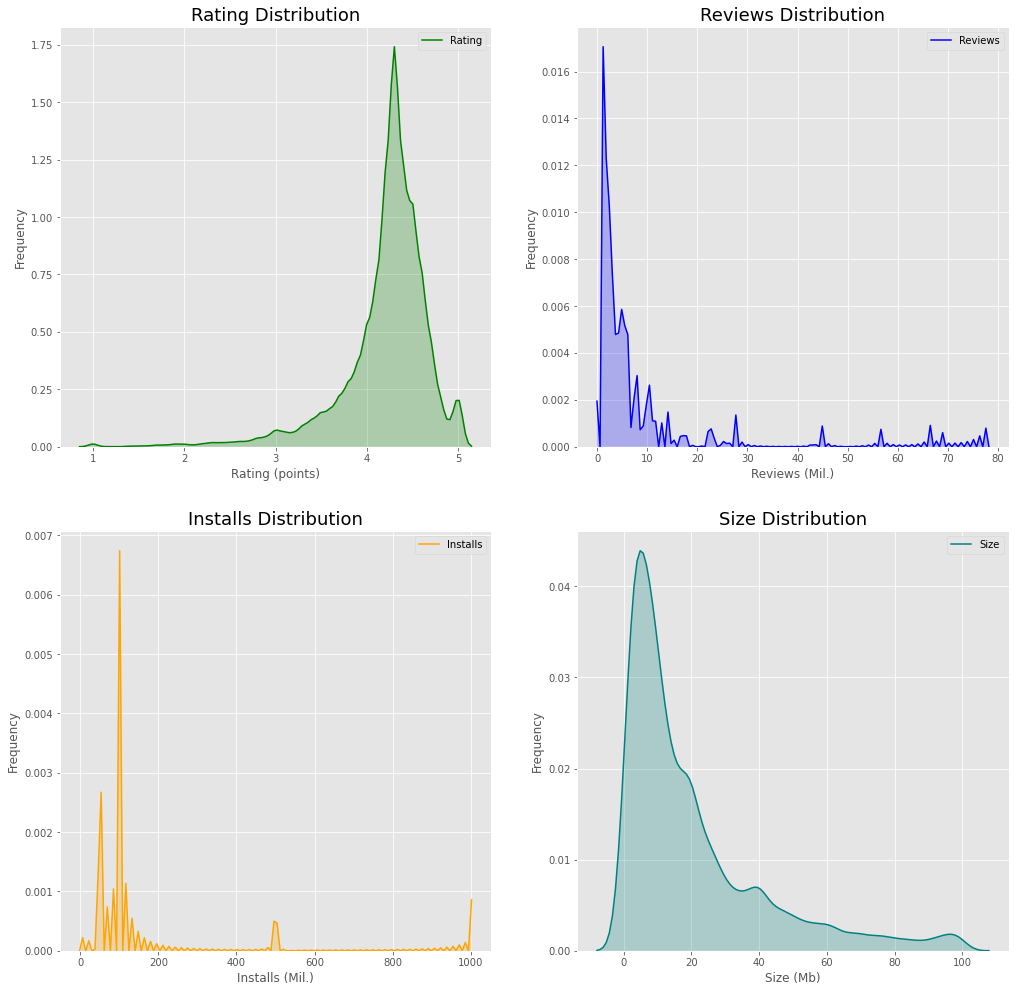

In [42]:
# Let's take a look on some distribution plots
plt.figure(figsize=(17,17))

plt.subplot(221)
sns.kdeplot(playstore.Rating, color='green', shade=True)
plt.ylabel('Frequency')
plt.xlabel('Rating (points)')
plt.title('Rating Distribution', size=18)

plt.subplot(222)
sns.kdeplot(playstore.Reviews/1000000, color='blue', shade=True)
plt.ylabel('Frequency')
plt.xlabel('Reviews (Mil.)')
plt.title('Reviews Distribution', size=18)

plt.subplot(223)
sns.kdeplot(playstore.Installs/1000000, color='orange', shade=True)
plt.ylabel('Frequency')
plt.xlabel('Installs (Mil.)')
plt.title('Installs Distribution', size=18)

plt.subplot(224)
sns.kdeplot(playstore.Size/1000000, color='teal', shade=True)
plt.ylabel('Frequency')
plt.xlabel('Size (Mb)')
plt.title('Size Distribution', size=18)

As we could see from both tabular information and our plot, average rating of applications is around 4.3.
Average size of applications is less then 20 Mbs. 

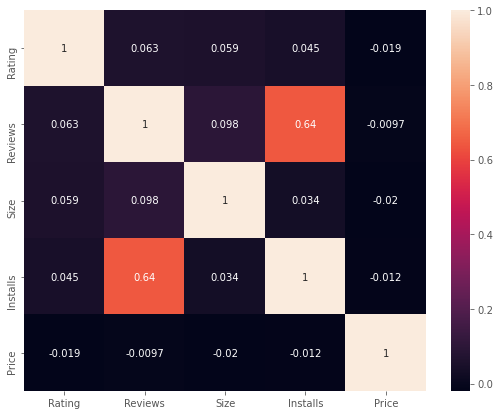

In [43]:
plt.figure(figsize=(9,7))
sns.heatmap(playstore.corr(), annot=True)

The only correlation that really high and make any sence here is between Installs and Reviews.

Text(0.5, 1.0, "Applications' rating across all categories")

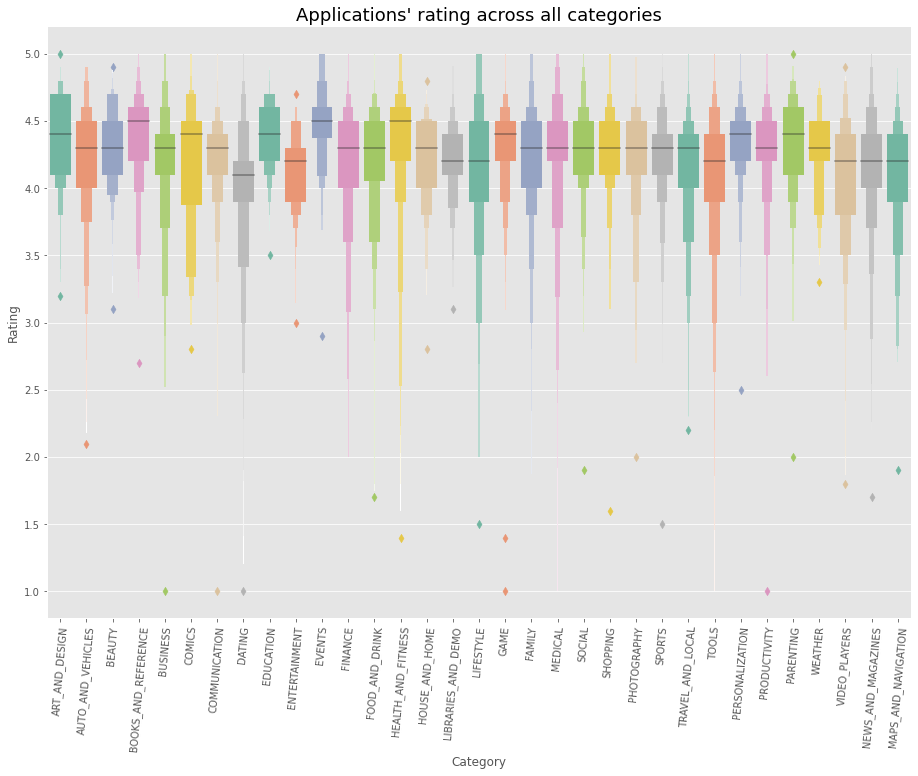

In [44]:
g=sns.catplot(x='Category', y='Rating', data=playstore, kind='boxen', palette='Set2', height=9, aspect=1.5)
g.set_xticklabels(rotation=85)
plt.title("Applications' rating across all categories", size = 18)

Average rating across all categories bounces between 4.0 and 4.5

Text(0.5, 0.98, 'Rating and Reviews')

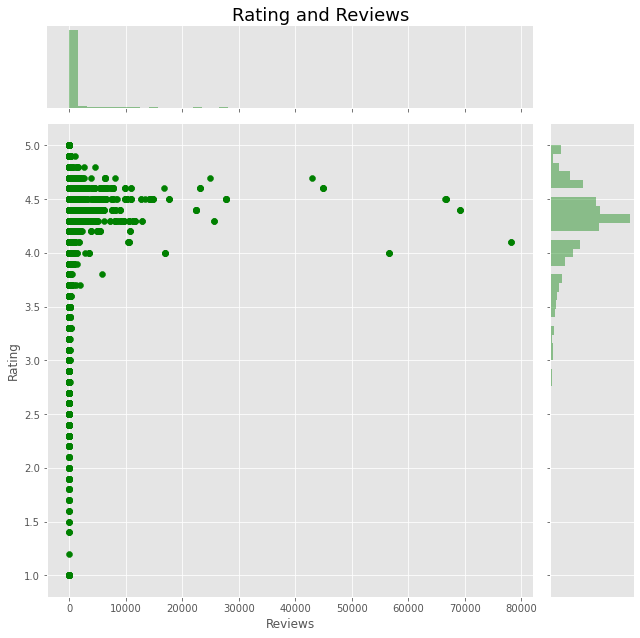

In [45]:
sns.jointplot(x=playstore.Reviews/1000, y='Rating', data=playstore, color = 'green', height=9)
plt.subplots_adjust(top=0.95)
plt.suptitle('Rating and Reviews', fontsize = 18)

Text(0.5, 1.0, 'Rating and Reviews')

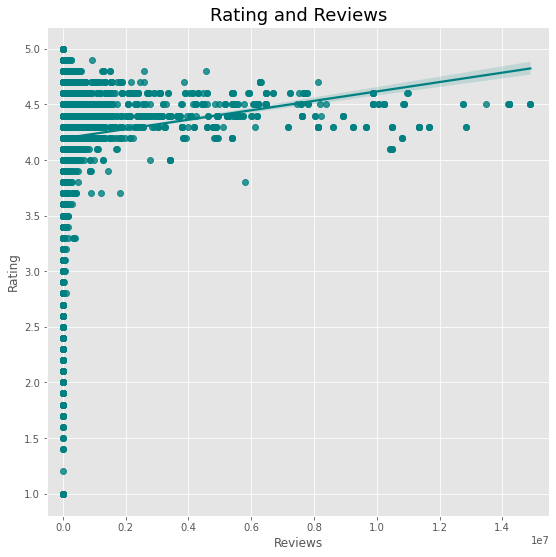

In [46]:
plt.figure(figsize=(9,9))
g=sns.regplot(x='Reviews', y='Rating', color = 'teal', data=playstore[playstore.Reviews<15000000])
g.set(xlim=(-500000,15500000))
plt.title('Rating and Reviews',size=18)

Text(0.5, 1.0, 'Rating and Installs')

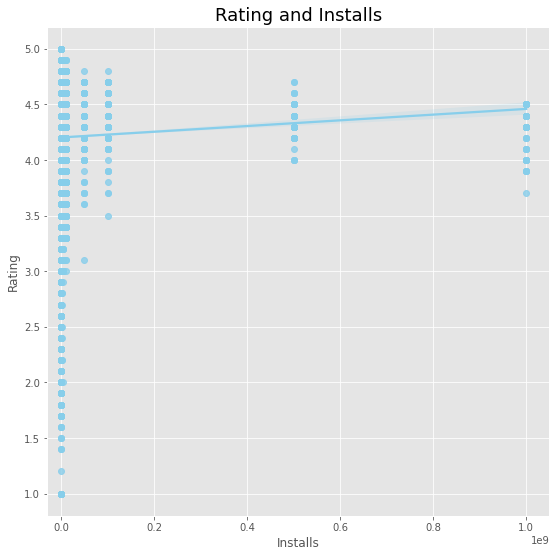

In [47]:
plt.figure(figsize=(9,9))
g=sns.regplot(x='Installs', y='Rating', data=playstore, color='skyblue')
g.set(xlim=(-30000000,1050000000))
plt.title('Rating and Installs',size=18)

Text(0.5, 0.98, 'Rating and Reviews per Installs')

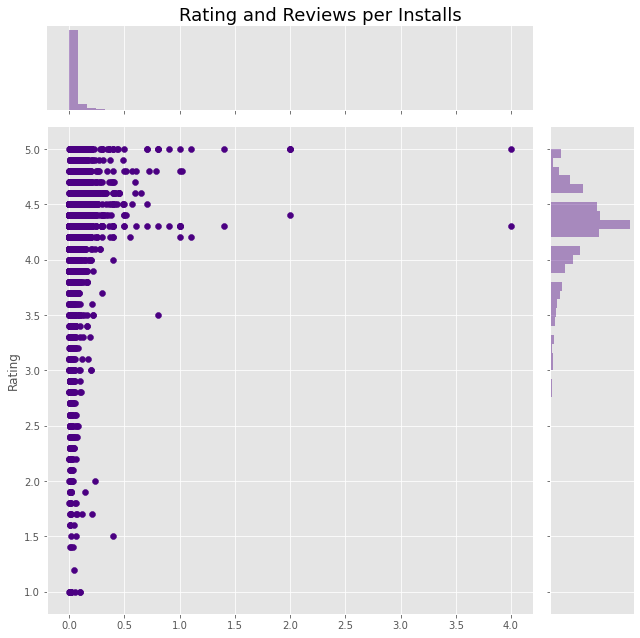

In [48]:
sns.jointplot(x=playstore.Reviews/playstore.Installs, y='Rating', data=playstore, color = 'indigo', height=9)
plt.subplots_adjust(top=0.95)
plt.suptitle('Rating and Reviews per Installs', fontsize = 18)

With more installs and reviews rating tends to be more balanced, as there are not so many variation the higher amount of reviews/instals are

Text(0.5, 0.98, 'Rating and Size')

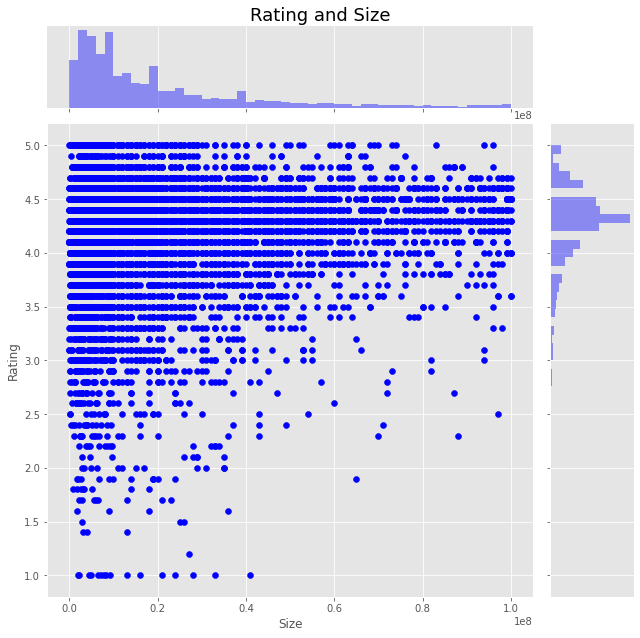

In [49]:
sns.jointplot(x='Size', y='Rating',data=playstore, color='blue', height=9)
plt.subplots_adjust(top=0.95)
plt.suptitle('Rating and Size', size=18)

Size does not affect Rating much, but yes, the bigger size of the application the less variation of rating is.

Text(0.5, 1.0, 'Percentage of free and paid apps')

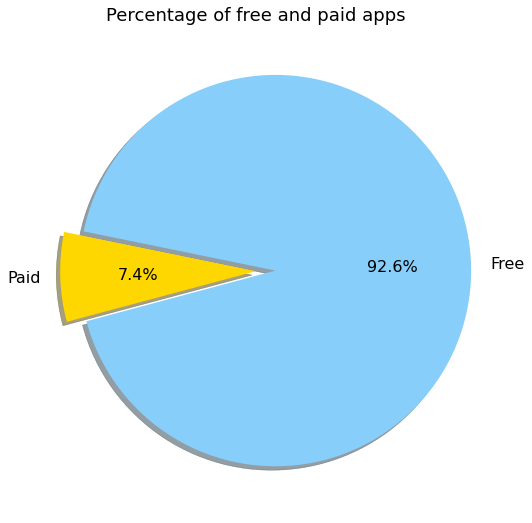

In [50]:
values = playstore.Type.value_counts(sort=True)
labels = playstore.Type.value_counts(sort=True).index

plt.figure(figsize=(9,9))
plt.pie(values, labels = labels, explode=(0.1,0), autopct='%.1f%%', shadow=True,
        colors=['lightskyblue','gold'], startangle=195, textprops={'fontsize': 16})
plt.title('Percentage of free and paid apps', size=18)

Most of the represented apps are free.

Text(0.5, 0.98, 'Rating and Price')

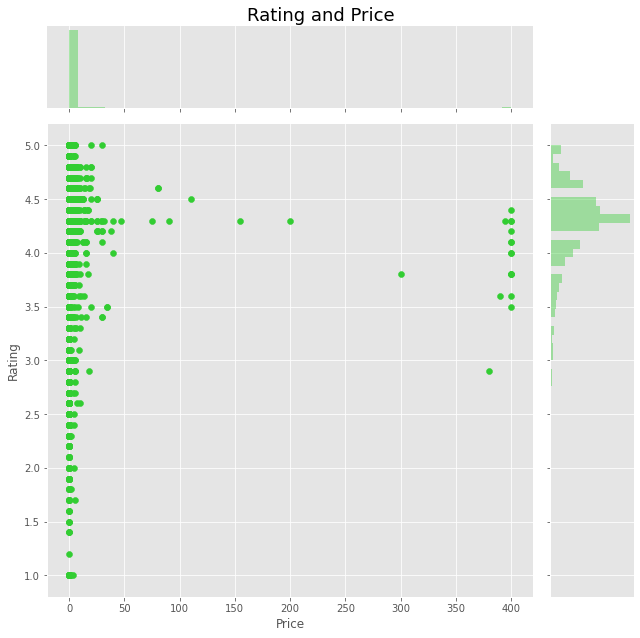

In [51]:
sns.jointplot(x='Price', y='Rating',data=playstore, color='limegreen', height=9)
plt.subplots_adjust(top=0.95)
plt.suptitle('Rating and Price', size=18)

Text(0.5, 1.0, 'Rating and price')

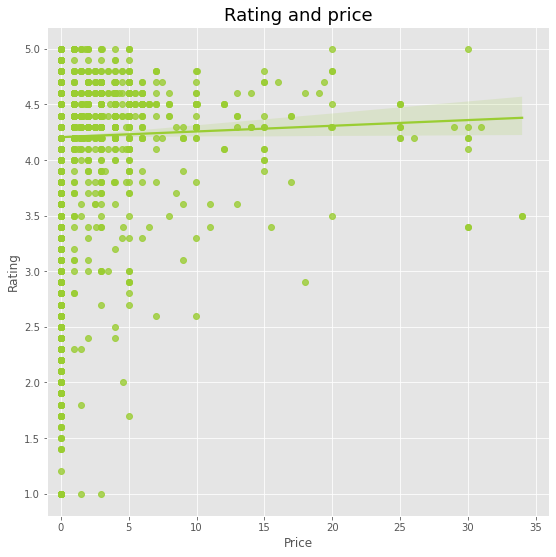

In [52]:
plt.figure(figsize=(9,9))
g=sns.regplot(x='Price', y='Rating', data=playstore[playstore.Price < 35], color='yellowgreen')
g.set(xlim=(-1,36))
plt.title('Rating and price',size=18)

As we see, that there are no so many difference on average if the price is smaller than 50 or even 30. But if the price is very high, average rating is slightly lower. We can look on rating in price categorywise.

In [53]:
playstore.loc[playstore['Price'] == 0, 'Price Category'] = 'Free'
playstore.loc[(playstore['Price'] > 0) & (playstore['Price'] <= 5), 'Price Category'] = 'Cheap'
playstore.loc[(playstore['Price'] > 5) & (playstore['Price'] <= 12), 'Price Category'] = 'Medium'
playstore.loc[(playstore['Price'] > 12) & (playstore['Price'] <= 35), 'Price Category'] = 'High'
playstore.loc[(playstore['Price'] > 35) & (playstore['Price'] <= 90), 'Price Category'] = 'Very High'
playstore.loc[(playstore['Price'] > 90) & (playstore['Price'] <= 200), 'Price Category'] = 'Extremely High'
playstore.loc[playstore['Price'] > 200, 'Price Category'] = 'Luxury'

Text(0.5, 1.0, 'Percentage of only paid applications')

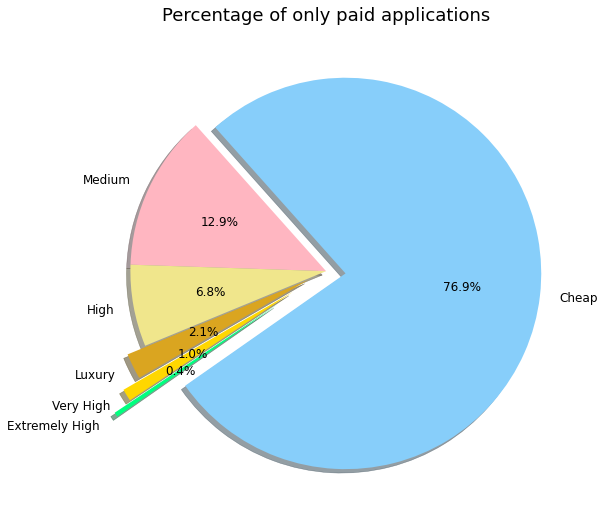

In [54]:
paidapps=playstore.drop(playstore[playstore['Price Category']=='Free'].index, axis=0)
values = paidapps['Price Category'].value_counts()
labels = paidapps['Price Category'].value_counts().index
colors=['LightSkyBlue','LightPink','Khaki','Goldenrod','Gold','SpringGreen']
plt.figure(figsize=(9,9))
plt.pie(values, labels = labels, autopct='%.1f%%', shadow=True, colors=colors,
        startangle=215, explode=(0.1,0,0,0.1,0.2,0.3), textprops={'fontsize': 12})
plt.title('Percentage of only paid applications', size=18)

Anyways, **most of the applications** have the cheapest price *(1-5 dollars)* and almost **13 percents** have medium price *(6-12 dollars)*.

Text(0.5, 1.0, 'Rating across all price categories ')

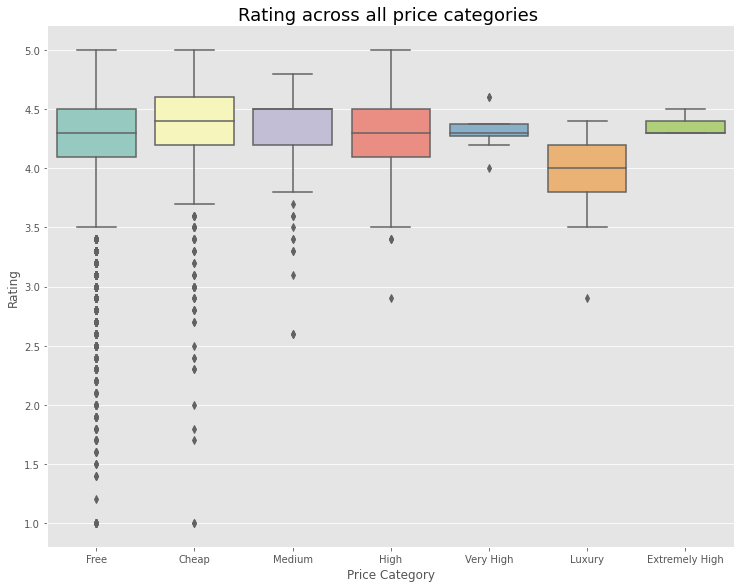

In [55]:
sns.catplot(x='Price Category', y='Rating', data=playstore, kind='box', palette='Set3', height=8, aspect=1.3)
plt.title('Rating across all price categories ',size=18)

In [56]:
playstore.groupby('Price Category')['Rating'].mean().sort_values(ascending=False)

Price Category
Extremely High    4.366667
Very High         4.325000
Medium            4.300000
Cheap             4.287480
High              4.248148
Free              4.200886
Luxury            3.911765
Name: Rating, dtype: float64

A we see, average rating for every category is between 4.5 and 4.3. But buyers of the Luxury category find their purchases a little bit less worthy, that is why there is a drop in 0.5 points on average.

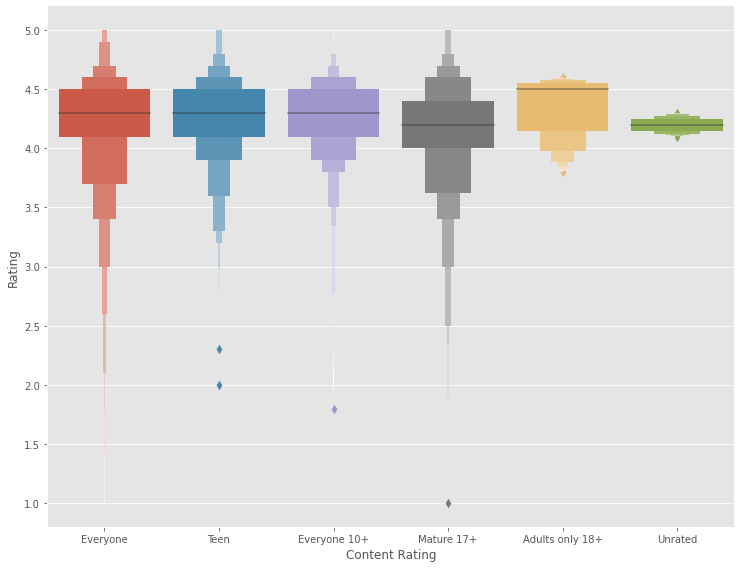

In [57]:
sns.catplot(x='Content Rating', y='Rating', data=playstore, kind='boxen', height=8, aspect=1.3)

In [58]:
playstore.groupby('Content Rating')['Rating'].mean()

Content Rating
Adults only 18+    4.300000
Everyone           4.203684
Everyone 10+       4.259662
Mature 17+         4.127655
Teen               4.242384
Unrated            4.200000
Name: Rating, dtype: float64

There is a situation, what we have observed before with other aspects. Average ratings are bouncing between 4.0 and 4.5.
18+ Applications are rated higher than other.

### Conclusions
- Family, Game and Tools are the most wide represented categories
- Average Rating across all categories varies between 4.0 and 4.5 on average.
- With the higher numbers of installs and reviews the Rating tends to be more balanced, which is on the other hand is pretty obvious
- There are no realy high correlations betweeen variables, except of between Reviews and Installs
- There are more than 90% of the apps are free and almost 80% of the paid applications cost less than 5$
- For ML purposes could be very interesting to set column 'Rating' as a target variable and play with the expalanatory variables (which should be included and which don't, of course there are some transformation and variables engineering viable)
- Some columns were untouchable, but there is a lot of potential in analysing them. E.g. 'Last Updated' could be there informative, as we have transfromed it into a time format. It is possible to observe some dynamics in terms of update regularity and rating (whether is any influence on the rating if the application is updated often/seldom). Unfortunately the data set is too old (around 2 years), so it makes not so much sense in 2020 to do so.